In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('./')
from planar_ising.planar_ising.inference_and_sampling import InferenceAndSampling
from planar_ising.planar_ising.planar_ising_model_generator import PlanarIsingModelGenerator
from planar_ising.planar_graph.planar_graph_edges import PlanarGraphEdges
from planar_ising.planar_graph.planar_graph_generator import PlanarGraphGenerator

from triangular_lattice import *

%load_ext autoreload
%autoreload 2

In [2]:
def get_interactions_matrix(ising_model):

    graph = ising_model.graph
    interaction_values = ising_model.interaction_values

    interactions_matrix = np.zeros((graph.size, graph.size), dtype=np.float64)

    interactions_matrix[graph.edges.vertex1, graph.edges.vertex2] = interaction_values
    interactions_matrix[graph.edges.vertex2, graph.edges.vertex1] = interaction_values

    return interactions_matrix

In [10]:
L,T=4,2  
# x-positions of vertices, y-positions of vertices, adjacency matrix for triagular lattice
basisx, basisy, adjmatrix = trnglr_lattice(L,T)

# database of the edges is in the format:
# [index,vertex1,vertex2,c1,cc1,c2,cc2]
database = list_edges(adjmatrix, basisx, basisy)
jmatrix = random_couplings(adjmatrix)

In [11]:
# Compute exact log-partition function
Z = partition_function(.5*jmatrix)
print('log(Z_exact):', np.log(Z))

log(Z_exact): 5.586348264276702


In [12]:
# Compute log-partition function for planar graph, complexity is O(V^3), where V - total number of spins

jmatrix_planar = -1 * jmatrix
ising_model = PlanarIsingModelGenerator.generate_triang_ising_model(database, jmatrix_planar)
ising_inference = InferenceAndSampling(ising_model)
ising_inference.prepare()
log_partition_function = ising_inference.compute_logpf()

print('log(Z_planar):', log_partition_function)

log(Z_planar): 5.586348264276703


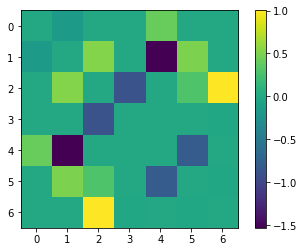

In [248]:
plt.imshow(jmatrix)
plt.colorbar()

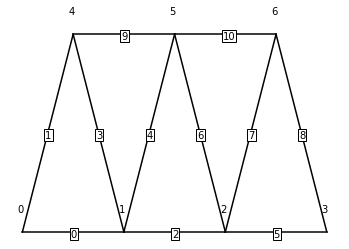

In [253]:
visualize(database, basisx, basisy, adjmatrix)